In [1]:
# coding: utf-8

# In[1]:

import pandas as pd
# from pymongo import MongoClient
# import ijson
import numpy as np
import json
import tweepy
import re
from sklearn.utils import shuffle

import glob
from collections import Iterable, OrderedDict

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import gutenberg
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer

# Primary Module for Keyphrase focussed Topic Modelling and Sentiment Analsysid
import sent_analyzer as se

Using TensorFlow backend.


In [2]:
all_restaurant_categories=['specialty food', 'restaurants', 'dim sum', 'imported food', 'food', 'chinese', 'ethnic food', 'seafood', 'sushi bars', 'japanese', 'breakfast & brunch', 'mexican', 'tacos', 'tex-mex', 'fast food', 'bars', 'nightlife', 'pubs', 'irish pub', 'italian', 'pizza', 'chicken wings', 'bakeries', 'sandwiches', 'salad', 'burgers', 'comfort food', 'patisserie/cake shop', 'juice bars & smoothies', 'vegan', 'department stores','tapas bars', 'southern', 'coffee & tea', 'ice cream & frozen yogurt','american (traditional)', 'american (new)', 'steakhouses', 'food banks', 'vintage & consignment', 'desserts', 'hotels', 'dentists', 'modern european', 'wine bars', 'music venues', 'cupcakes','hookah bars', 'persian/iranian', 'middle eastern', 'beer', 'wine & spirits', 'lounges', 'delis', 'fish & chips', 'polish', 'caterers','korean', 'custom cakes', 'cafes', 'canadian (new)', 'portuguese', 'mediterranean','donuts','vietnamese', 'thai','caribbean', 'asian','asian fusion', 'hot dogs', 'vegetarian', 'soup', 'french', 'creperies', 'buffets','chocolatiers & shops','diners','barbeque','turkish','herbs & spices', 'gastropubs', 'cajun/creole','moroccan','tapas/small plates','gluten-free','hawaiian', 'poke', 'ramen','taiwanese', 'pakistani', 'indian','soul food', 'filipino','organic stores','hakka','peruvian', 'gelato', 'coffee roasteries', 'bubble tea', 'greek', 'cocktail bars', 'latin american', 'halal','lebanese', 'do-it-yourself food', 'mongolian', 'puerto rican',  'food stands', 'waffles','dinner theater','bagels', 'delicatessen', 'fondue', 'popcorn shops','cantonese', 'food trucks','fruits & veggies', 'farmers market','african','kosher', 'ukrainian', 'whiskey bars','hot pot', 'malaysian', 'champagne bars', 'wine tasting room', 'wineries', 'firewood', 'yelp events', 'cheese shops', 'irish', 'bed & breakfast', 'sri lankan', 'seafood markets', 'bistros','pretzels', 'kebab','hungarian', 'british','german','afghan',  'ethical grocery', 'brazilian','cheesesteaks', 'laotian', 'beer tours', 'bar crawl', 'honduran', 'salvadoran', 'nicaraguan','ethiopian','falafel','spanish', 'food tours', 'muay thai', 'international grocery', 'ethnic grocery','russian', 'acai bowls', 'beach bars','rotisserie chicken', 'new mexican cuisine', 'cambodian','trinidadian', 'syrian', 'szechuan', 'scottish',  'food court',  'wine tours',  'cuban', 'bangladeshi', 'austrian', 'singaporean', 'coffee & tea supplies','cideries', 'conveyor belt sushi', 'shanghainese', 'tuscan', 'indonesian', 'uzbek', 'haitian','cafeteria',  'burmese','coffeeshops', 'sicilian', 'dominican', 'colombian', 'concept shops', 'empanadas', 'airport lounges', 'supper clubs', 'egyptian','japanese sweets', 'czech/slovakian', 'czech',  'pop-up restaurants','kombucha','scandinavian','pub food', 'swiss food', 'japanese curry', 'slovakian', 'beer garden', 'pita', 'tonkatsu', 'tempura','island pub','guamanian', 'iberian', 'eastern european', 'beer hall', 'soba', 'bulgarian', 'milkshake bars', 'hainan', 'hotel bar', 'churros','chicken wings','belgian']
restarurant_business_id_list=[]
restarurant_business_id_w_city_dict={}
restaurant_review_data_list=[]
restaurant_review_sent_data_list=[]

In [3]:
restaurant_sentiment_analyzer=se.sentiment_analyzer()

/Users/satadisha/Documents/GitHub/DI Capstone Folder/sent_analyzer.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  review_data['class'][review_data['stars']>3]=1


32073 67927
normalizing review text: 
vectorizing text input: 
Logistic_regression training done..
SVM training done..
padding done..
embedding loaded..
layer 1..
layer 2..
convolution, max pooling, activation done..
Train on 60000 samples, validate on 15000 samples
Epoch 1/6
60000/60000 [==============================] - 28s 472us/step - loss: 0.3626 - acc: 0.8409 - val_loss: 0.3018 - val_acc: 0.8753
Epoch 2/6
60000/60000 [==============================] - 27s 454us/step - loss: 0.2737 - acc: 0.8875 - val_loss: 0.2846 - val_acc: 0.8821
Epoch 3/6
60000/60000 [==============================] - 29s 489us/step - loss: 0.2271 - acc: 0.9105 - val_loss: 0.2790 - val_acc: 0.8822
Epoch 4/6
60000/60000 [==============================] - 33s 545us/step - loss: 0.1898 - acc: 0.9289 - val_loss: 0.3001 - val_acc: 0.8721
Epoch 5/6
60000/60000 [==============================] - 29s 479us/step - loss: 0.1546 - acc: 0.9460 - val_loss: 0.2905 - val_acc: 0.8844
Epoch 6/6
60000/60000 [====================

In [4]:
#For model comparison: Logistic Regresssion, SVM, and CNN
# test_df=restaurant_sentiment_analyzer.run(pd.DataFrame([]),'model_compare')

In [5]:
# dummy_df, topics_w_keyphrases= restaurant_sentiment_analyzer.run_keyphrase_topic_modeling(pd.DataFrame([]),'default')

In [6]:
# In[5]:

# topics_sentiment_scores,scores_per_topic=restaurant_sentiment_analyzer.return_topic_sentiment_scores(pd.DataFrame([]),'default')


# In[6]:

#calculating sentiment scores per topic
# for index in range(len(topics_w_keyphrases)):
#     print('for topic '+str(index)+' keywords: ')
#     print(topics_w_keyphrases[index])
#     print('sentiment score: ', topics_sentiment_scores[index])

# Comparing model performances on test set:
# restaurant_sentiment_analyzer.plot_confusion_matrix()

In [7]:
global_sent_tokenizer_tracker=0
global_review_writer_count=0
restarurant_business_id_w_category_dict={}

# from tweepy.models import Status
def on_data_business(data):
    full_text=""

    # data2 = json.loads(data)
    data = json.loads(data)

    business_id=data['business_id']
    name=data['name']
    # neighborhood=data['neighborhoods']
    address=data['address']
    city=str(data['city']).lower()
    state=data['state']
    postal_code=data['postal_code']
    latitude=data['latitude']
    longitude=data['longitude']
    categories=str(data['categories'])

    d= {'business_id': business_id,'name':name,'address':address,'city':city,'state':state,'postal_code':postal_code, 'latitude':latitude, 'longitude':longitude, 'categories':categories}
    return d

def on_data_review(data):
    

    # data2 = json.loads(data)
    data = json.loads(data)

    review_id=data['review_id']
    business_id=data['business_id']
    # neighborhood=data['neighborhoods']
    stars=data['stars']
    date=data['date']
    text=data['text']
    if(business_id in restarurant_business_id_list):
        d= {'review_id': review_id,'business_id':business_id,'stars':stars,'date':date,'text':text}
        restaurant_review_data_list.append(d)
    return
#         return d, True
#     return {}, False

def on_data_sent_review(data):
    
    global global_review_writer_count
    # data2 = json.loads(data)
    data = json.loads(data)

    review_id=data['review_id']
    business_id=data['business_id']
    # neighborhood=data['neighborhoods']
    stars=data['stars']
    date=data['date']
    text=data['text']
#     truth_val=str(int(starts)/5.0)
#     if(business_id not in restarurant_business_id_list):
#         d= {'review_id': review_id,'business_id':business_id,'stars':stars,'truth':truth_val, 'date':date,'text':text}
#         restaurant_review_sent_data_list.append(d)
    if(business_id not in restarurant_business_id_list):
        global_review_writer_count+=1
        d= {'review_id': review_id,'business_id':business_id,'stars':stars,'date':date,'text':text}
        restaurant_review_sent_data_list.append(d)
    return global_review_writer_count

def get_restaurant_value(business_id):
    return restarurant_business_id_w_city_dict[business_id]

In [8]:
def restaurant_check(category_str):
    # print(category_str)
    category_list=[category.strip() for category in str(category_str).lower().split(',')]
    # flag=False
    for category in category_list:
        if(category in all_restaurant_categories):
            return True
    return False

In [9]:
def get_sentences(text):
    global global_sent_tokenizer_tracker
    
    tweetSentences=list(filter (lambda sentence: len(sentence)>1, text.split('\n')))
    # tweetSentenceList_inter=self.flatten(list(map(lambda sentText: sent_tokenize(sentText.lstrip().rstrip()),tweetSentences)),[])

    tweetSentenceList_flat=[]
    for sentText in tweetSentences:
        # if(len(sentences)>1):
        sentences=my_sentence_tokenizer.tokenize(sentText.lstrip().rstrip())
        for sentence in sentences:
            tweetSentenceList_flat.extend(list(filter (lambda splitted_sentence: len(splitted_sentence)>1, re.split(r'[.]{2,}',sentence))))
        # else:
        #     tweetSentenceList_flat.append(sentences)
    # print(tweetSentenceList_flat)
    global_sent_tokenizer_tracker+=1
    if((global_sent_tokenizer_tracker%100000)==0):
        print(global_sent_tokenizer_tracker)

    return tweetSentenceList_flat

In [10]:
business_columns_list=['business_id','name','address','city','state','postal_code','latitude','longitude','categories']
business_data_list=[]

with open('/Users/satadisha/Documents/GitHub/yelp_dataset/business.json', 'r') as fp:
    for line in fp:
        # print(json_str)
        parsed_data= on_data_business(line)
        business_data_list.append(parsed_data)
    # print(stream_count)
print(len(business_data_list))
business_data = pd.DataFrame(business_data_list,columns=business_columns_list)


192609


In [11]:
business_data['is_restaurant']=np.vectorize(restaurant_check)(business_data['categories'].values)
restaurant_data=business_data[business_data['is_restaurant']==True]
print(len(restaurant_data))

restaurant_cities=restaurant_data.city.unique()

86930


In [12]:
city_frequency_stats={}
for city in restaurant_cities:
    if(city!='none'):
        # print(city,len(restaurant_data[restaurant_data['city']==city]))
        city_restaurants_data=restaurant_data[restaurant_data['city']==city]
        frequency=len(city_restaurants_data)
        if(frequency>25):
            business_ids=city_restaurants_data.business_id.values.tolist()
            for business_id in business_ids:
                restarurant_business_id_w_city_dict[business_id]=city
#                 restarurant_business_id_w_category_dict[business_id]=city
            
            restarurant_business_id_list.extend(business_ids)
            
            city_frequency_stats[city]=(frequency,business_ids)

print(len(city_frequency_stats))
fp.close()

194


In [13]:
print(len(restarurant_business_id_list),len(restarurant_business_id_w_city_dict))
columns_list=['review_id','business_id','stars','date','text']
column_list_sent_data=['review_id','business_id','stars','date','text']
# c=0

# with open('/home/satadisha/Desktop/GitProjects/data/yelp_dataset/review.json','r') as fp:
#     for line in fp:
#         on_data_review(line)
#         c+=1
#         if((c%100000)==0):
#             print(c)
# print(len(restaurant_review_data_list))

# with open('/home/satadisha/Desktop/GitProjects/data/yelp_dataset/review.json','r') as fp2:
#     for line in fp2:
#         check=on_data_sent_review(line)
# #         if((check%1000)==0):
# #             print(check)
#         if(check==100000):
#             break
# fp2.close()
# review_data_sent_analysis = pd.DataFrame(restaurant_review_sent_data_list, columns=column_list_sent_data)
# print(len(review_data_sent_analysis))
# review_data_sent_analysis.to_csv("/home/satadisha/Desktop/GitProjects/data/yelp_dataset/review_sent_analysis.csv", sep=',', encoding='utf-8',index=False)

84103 84103


In [14]:
city_frequency_stats_sorted= OrderedDict(sorted(city_frequency_stats.items(), key=lambda x: x[1][0], reverse= True))
# city_w_highest_restaurants=list(city_frequency_stats_sorted.keys())[0]

In [15]:
city=list(city_frequency_stats_sorted.keys())[0]
frequency=city_frequency_stats_sorted[city][0]
print(city,frequency)

toronto 11162


In [16]:
review_data=pd.read_csv("/Users/satadisha/Documents/GitHub/yelp_dataset/reviews_"+city+".csv",sep =',')
print(len(review_data))
print(review_data.isnull().any())
review_data = review_data.dropna()
print(len(review_data))

444550
review_id          False
business_id        False
stars              False
date               False
text               False
restaurant_city    False
dtype: bool
444550


In [17]:
category_dict=pd.Series(restaurant_data.categories.values,index=restaurant_data.business_id).to_dict()
city_category_list=[]

In [18]:
def get_restaurant_category_value(business_id):
    ret_lst= (list(map(lambda category: category.lower().strip(), category_dict[business_id].split(', '))))
    city_category_list.extend(ret_lst)
    return ret_lst

city_category_list_final=[]
def get_city_category_list_final(category_lists):
    for lst in category_lists:
        city_category_list_final.extend(lst)
    return

review_data['restaurant_category']=np.vectorize(get_restaurant_category_value,otypes=[object])(review_data['business_id'].values)

# A double filter here is benefitial
review_data=(review_data[review_data.apply(lambda row:all(category in all_restaurant_categories for category in row['restaurant_category']) ,axis=1)])
print(len(review_data))

340599


In [19]:
review_data['date'] = pd.to_datetime(review_data['date'])
# review_data['date'] = review_data['date'].dt.date
print(review_data['date'][:5])
print(type(review_data['date']))
get_city_category_list_final(review_data['restaurant_category'].values.tolist())

0   2012-07-16 00:37:14
1   2017-04-07 21:27:49
3   2017-12-29 13:55:19
4   2015-04-01 13:31:35
5   2011-09-25 18:10:04
Name: date, dtype: datetime64[ns]
<class 'pandas.core.series.Series'>


In [20]:
unique_city_categories=list(set(city_category_list_final).intersection(set(all_restaurant_categories)))
print(unique_city_categories)

['gelato', 'tex-mex', 'middle eastern', 'desserts', 'ramen', 'laotian', 'falafel', 'fast food', 'thai', 'scandinavian', 'international grocery', 'chicken wings', 'greek', 'creperies', 'beer hall', 'trinidadian', 'german', 'syrian', 'burgers', 'ethnic grocery', 'african', 'organic stores', 'salvadoran', 'herbs & spices', 'kebab', 'gastropubs', 'bubble tea', 'irish', 'burmese', 'poke', 'afghan', 'bars', 'hakka', 'korean', 'soup', 'coffee & tea supplies', 'comfort food', 'food trucks', 'wine & spirits', 'slovakian', 'lebanese', 'mexican', 'tapas/small plates', 'cantonese', 'milkshake bars', 'canadian (new)', 'barbeque', 'cafes', 'steakhouses', 'fondue', 'portuguese', 'dim sum', 'pakistani', 'gluten-free', 'bangladeshi', 'asian fusion', 'patisserie/cake shop', 'swiss food', 'pizza', 'chocolatiers & shops', 'farmers market', 'russian', 'brazilian', 'cheese shops', 'vietnamese', 'irish pub', 'szechuan', 'breakfast & brunch', 'malaysian', 'mongolian', 'delicatessen', 'beer', 'wine bars', 'cus

In [21]:
print(len(unique_city_categories))
def category_check (category, category_list):
    return (category in category_list)
count=0
def get_halfYearly_period(start_date, date):
    print(type(date),type(start_date))
    return 
#     return (date.to_period('M') - start_date.to_period('M'))/6

165


In [93]:
category_dict={}
restaurant_sentiment_analyzer.num_topics=1

from PIL import Image
import matplotlib.pyplot as plt
import wordcloud
mask_path_good='like_emoticon.png'
mask_path_bad='dislike_emoticon.png'

def plot_topics(topics_w_keyphrases_arr,title):

    for i in range(len(topics_w_keyphrases_arr)):
        if(i==0):
            mask_path=mask_path_good
        else:
            mask_path=mask_path_bad
        mask=np.array(Image.open(mask_path))
        topic_element=topics_w_keyphrases_arr[i][0]
        wordcloud_spa = wordcloud.WordCloud(
                background_color="white",
                max_words=1000,
                width=1024,
                height=720,
                stopwords=restaurant_sentiment_analyzer.stopwords,
                mask=mask
            ).generate_from_frequencies(topic_element)
        image_colors = wordcloud.ImageColorGenerator(mask)
        plt.subplot(1, 2, (i+1))
        plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
    plt.title(title,x=-0.2,y=-0.2)
    plt.show()
    return

In [75]:
def analyze_reviews(category,category_city_df):
    category_city_df=restaurant_sentiment_analyzer.run(category_city_df,'test')    
    print(category_city_df.columns.values)
    

    sorted_dates=sorted(category_city_df['date'].tolist())
    print(sorted_dates[0],sorted_dates[-1])
    category_city_df['min_date']=pd.to_datetime(sorted_dates[0])
    category_city_df['period']=(category_city_df['date'].sub(category_city_df['min_date'], axis=0)/np.timedelta64(180, 'D')).apply(np.ceil)

    review_tuples_per_period=[(period,len(category_city_df[category_city_df['period']==period])
                               ,len(category_city_df[category_city_df['period']==period].business_id.unique().tolist())
                               ,len(category_city_df[(category_city_df['period']==period)&(category_city_df['sent_score_SVM']==1)])/len(category_city_df[category_city_df['period']==period])*100
                               ,len(category_city_df[(category_city_df['period']==period)&(category_city_df['sent_score_SVM']==0)])/len(category_city_df[category_city_df['period']==period])*100
                               ) 
                              for period in sorted(category_city_df['period'].unique().tolist())]
#     ret_lst=[]
#     for tup in review_tuples_per_period:
#         if(tup[-1]>0):
#             ret_lst.append(tup, tup[-2]/tup[-1])
#         else:
#             ret_lst.append(tup, -1)
            
#     with open("toronto_sushi.csv","w")  as f:
#         writer=csv.writer(f, delimiter=", ", lineterminator="\r\n") 
#         writer.writerows(ret_lst)

# #     inflection_point=20.0 #indian
# #     inflection_point=12.0 #seafood
    inflection_point=8.0 #sushi bars

    #pre-inflection period
    category_city_df_pre_inflection_good_reviews, good_review_topics_pre_inflection= restaurant_sentiment_analyzer.run_keyphrase_topic_modeling(category_city_df[(category_city_df['period']<inflection_point)&(category_city_df['sent_score_SVM']==1)],'test')
    category_city_df_pre_inflection_bad_reviews, bad_review_topics_pre_inflection= restaurant_sentiment_analyzer.run_keyphrase_topic_modeling(category_city_df[(category_city_df['period']<inflection_point)&(category_city_df['sent_score_SVM']==0)],'test')
#     plot_topics([good_review_topics,bad_review_topics])

    #finding new business post inflection point
    pre_inflection_unique_bids=category_city_df[category_city_df['period']<inflection_point].business_id.unique().tolist()
    post_inflection_unique_bids=category_city_df[category_city_df['period']>=inflection_point].business_id.unique().tolist()
    new_businesses= list(set(post_inflection_unique_bids)-set(pre_inflection_unique_bids))
    print('new businesses: ',len(new_businesses))

    #post-inflection period
    category_city_df_post_inflection_good_reviews, good_review_topics_post_inflection= restaurant_sentiment_analyzer.run_keyphrase_topic_modeling(category_city_df[(category_city_df['period']>=inflection_point)&(category_city_df['sent_score_SVM']==1)],'test')
    category_city_df_post_inflection_bad_reviews, bad_review_topics_post_inflection= restaurant_sentiment_analyzer.run_keyphrase_topic_modeling(category_city_df[(category_city_df['period']>=inflection_point)&(category_city_df['sent_score_SVM']==0)],'test')
#     plot_topics([good_review_topics,bad_review_topics])

    category_dict[category]=review_tuples_per_period
#         count+=1
#         if(count>0):
#             break
    return good_review_topics_pre_inflection, bad_review_topics_pre_inflection, good_review_topics_post_inflection, bad_review_topics_post_inflection

In [61]:
# for category in unique_city_categories:
print(unique_city_categories)

['gelato', 'tex-mex', 'middle eastern', 'desserts', 'ramen', 'laotian', 'falafel', 'fast food', 'thai', 'scandinavian', 'international grocery', 'chicken wings', 'greek', 'creperies', 'beer hall', 'trinidadian', 'german', 'syrian', 'burgers', 'ethnic grocery', 'african', 'organic stores', 'salvadoran', 'herbs & spices', 'kebab', 'gastropubs', 'bubble tea', 'irish', 'burmese', 'poke', 'afghan', 'bars', 'hakka', 'korean', 'soup', 'coffee & tea supplies', 'comfort food', 'food trucks', 'wine & spirits', 'slovakian', 'lebanese', 'mexican', 'tapas/small plates', 'cantonese', 'milkshake bars', 'canadian (new)', 'barbeque', 'cafes', 'steakhouses', 'fondue', 'portuguese', 'dim sum', 'pakistani', 'gluten-free', 'bangladeshi', 'asian fusion', 'patisserie/cake shop', 'swiss food', 'pizza', 'chocolatiers & shops', 'farmers market', 'russian', 'brazilian', 'cheese shops', 'vietnamese', 'irish pub', 'szechuan', 'breakfast & brunch', 'malaysian', 'mongolian', 'delicatessen', 'beer', 'wine bars', 'cus

In [ ]:
# for category in unique_city_categories:
category='sushi bars'
# category='burgers'
# category='chinese'
# category='steakhouses'
# category='seafood'
# category='gastropubs'
# category='nightlife'

#     category_city_df=review_data[review_data.apply(lambda row:category in row['restaurant_category'] ,axis=1)]
review_data['category_check']=np.vectorize(category_check)(category, review_data['restaurant_category'].values)
category_city_df=review_data[review_data['category_check']==True]
print(category, len(category_city_df))
if(len(category_city_df)>100):
    #first receiving the df
    category_city_df= analyze_reviews(category,category_city_df)

In [66]:
date_tups=[]
for period in range(3,15):
    sorted_dates=sorted(category_city_df[category_city_df['period']==period]['date'].dt.date.tolist())
    date_tups.append((sorted_dates[0],sorted_dates[-1]))
print(date_tups)

[(datetime.date(2009, 6, 30), datetime.date(2009, 12, 25)), (datetime.date(2009, 12, 26), datetime.date(2010, 6, 24)), (datetime.date(2010, 6, 26), datetime.date(2010, 12, 21)), (datetime.date(2010, 12, 22), datetime.date(2011, 6, 19)), (datetime.date(2011, 6, 20), datetime.date(2011, 12, 16)), (datetime.date(2011, 12, 17), datetime.date(2012, 6, 13)), (datetime.date(2012, 6, 14), datetime.date(2012, 12, 10)), (datetime.date(2012, 12, 10), datetime.date(2013, 6, 8)), (datetime.date(2013, 6, 9), datetime.date(2013, 12, 5)), (datetime.date(2013, 12, 6), datetime.date(2014, 6, 3)), (datetime.date(2014, 6, 4), datetime.date(2014, 11, 30)), (datetime.date(2014, 11, 30), datetime.date(2015, 5, 29))]


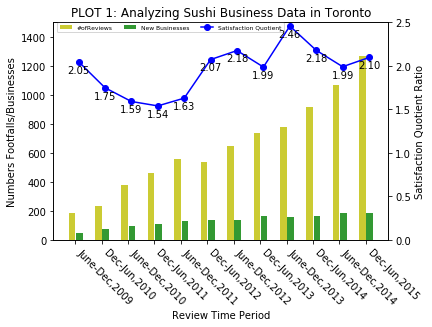

In [69]:
sushi_data=pd.read_csv("toronto_sushi.csv",sep =',')
#120--> baseline same as 100, Ritter has no concept of completion
# data to plot
n_groups = 12
period_dates=['June-Dec,2009','Dec-Jun,2010','June-Dec,2010','Dec-Jun,2011','June-Dec,2011','Dec-Jun,2012',
              'June-Dec,2012','Dec-Jun,2013','June-Dec,2013','Dec-Jun,2014','June-Dec,2014','Dec-Jun,2015',]

total_reviews=sushi_data['Total Number of Liste Bid in reviews in period'][3:15]
new_business=sushi_data['units'][3:15]
satisfaction_quotient=sushi_data['ratio'][3:15]

# print(new_business)
# create plot
fig, ax1 = plt.subplots()

index = np.arange(n_groups)

bar_width = 0.25
opacity = 0.8

rects1 = ax1.bar(index-bar_width, total_reviews, bar_width,
alpha=opacity,
color='y',
# ax=ax1,
label='#ofReviews')

rects2 = ax1.bar(index+0.1*bar_width, new_business, bar_width,
alpha=opacity,
color='g',
# ax=ax1,
label='New Businesses')


ax2 = ax1.twinx() 
rects3 = ax2.plot(range(n_groups), satisfaction_quotient,'bo-',
# ax=ax2,
label='Satisfaction Quotient')


for x,y in zip(range(n_groups),satisfaction_quotient):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-11.2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

ax1.set_ylim([0,1500])
ax2.set_ylim([0,2.5])
 
ax1.set_xlabel('Review Time Period')
ax1.set_ylabel('Numbers Footfalls/Businesses')
ax2.set_ylabel('Satisfaction Quotient Ratio')
plt.title('PLOT 1: Analyzing Sushi Business Data in Toronto')
# ax1.set_xticks(index + 1.0*bar_width, ('20', '40', '60', '80', '100'))
ax1.set_xticks(index-0.5*bar_width)
# ax1.set_xticklabels(['3','4','5','6', '7','8','9','10','11','12','13','14'])
ax1.set_xticklabels(period_dates)

for tick in ax1.get_xticklabels():
        tick.set_rotation(45)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()


lgd=ax1.legend(lines + lines2, labels + labels2, bbox_to_anchor=(0.35,1.0), ncol=3, loc=9, prop={'size': 6}, borderaxespad=0.)

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=-45, ha="left" )
# plt.savefig('performance-eviction-threshold-all-system-variants.png', dpi = 900, bbox_extra_artists=(lgd,), bbox_inches='tight')
 
# plt.tight_layout()
plt.show()

In [76]:
good_review_topics_pre_inflection, bad_review_topics_pre_inflection, good_review_topics_post_inflection, bad_review_topics_post_inflection = analyze_reviews(category,category_city_df)

normalizing review text: 
vectorizing text input: 
CNN preprocessing:
['review_id' 'business_id' 'stars' 'date' 'text' 'restaurant_city'
 'restaurant_category' 'category_check' 'normalized_word_lists'
 'normalized_text' 'sent_score_LR' 'sent_score_SVM' 'sent_score_CNN'
 'min_date' 'period']
2008-07-04 20:19:44 2018-11-14 18:03:25


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1263
1
697    [(0, 1.0)]
701    [(0, 1.0)]
788    [(0, 1.0)]
842    [(0, 1.0)]
935    [(0, 1.0)]
Name: topic_scores, dtype: object
747
1
607    [(0, 1.0)]
661    [(0, 1.0)]
953    [(0, 1.0)]
976    [(0, 1.0)]
977    [(0, 1.0)]
Name: topic_scores, dtype: object
new businesses:  193
12543
1
28    [(0, 1.0)]
35    [(0, 1.0)]
38    [(0, 1.0)]
39    [(0, 1.0)]
47    [(0, 1.0)]
Name: topic_scores, dtype: object
6247
1
174    [(0, 1.0)]
184    [(0, 1.0)]
268    [(0, 1.0)]
291    [(0, 1.0)]
316    [(0, 1.0)]
Name: topic_scores, dtype: object


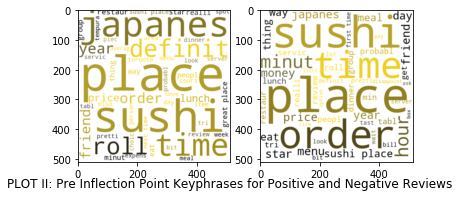

In [97]:
plot_topics([good_review_topics_pre_inflection,bad_review_topics_pre_inflection],'PLOT II: Pre Inflection Point Keyphrases for Positive and Negative Reviews')

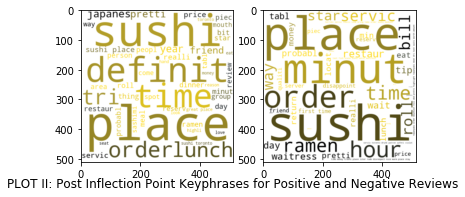

In [98]:
plot_topics([good_review_topics_post_inflection,bad_review_topics_post_inflection],'PLOT II: Post Inflection Point Keyphrases for Positive and Negative Reviews')